___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Ecommerce Customers Linear Regression 

In this project fundamental Data Analysis and Machine Learning is done with the data of customers at an Ecommerce company based in New York City.  (This is not real data from a company but was compiled using other sources.)  The company sells clothing online but they also have an in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, and then order from home using either a mobile app or website for the clothes they want.  The company wants to determine if they should focus their efforts more on the mobile app or the website.

The libraries used in this project are Pandas, Seaborn, Matplotlib and Scikit-learn. 

The numerical columns in our dataframe are as follows:
* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

Analyses done in this project:

* Various visualizations are used to detect patterns in the data
* An lmplot() shows the strong positive correlation between the yearly amount a customer spends and the length of her / his membership.
* The numerical data is then trained, tested and fitted to a linear regression model and the model is evaluated using the test set of the data.  A scatterplot for the y test values against the predicted y values shows that we have a very good model.
* The Mean Absolute Error, Root Mean Squared Error and R^2 is determined and interpreted.  From these metrics we can deduce that the model is a very good fit for the data and that R^2 accounts for 99% of the variation in the data. 
* The linear coefficients from the numerical columns are interpreted.  A conclusion is made on the company’s question of whether they should spend more efforts on developing the mobile app or the website.

This project was done through Jose Portilla (head of Data Science at Pierian Data Inc.) on Udemy (Python for Data Science and Machine Learning Bootcamp).

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#### Read in the data

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis
___
#### Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?

In [6]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<Figure size 864x576 with 0 Axes>

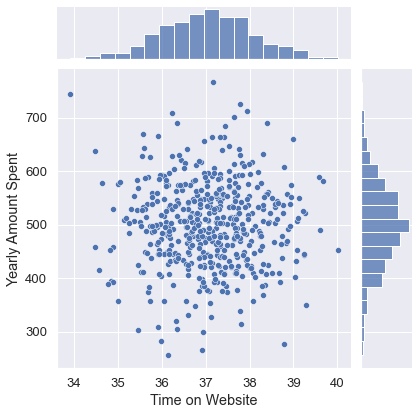

In [9]:
plt.figure(figsize = (12,8))
sns.set(font_scale = 1.2)
sns.jointplot(data = customers, x= 'Time on Website', y= 'Yearly Amount Spent' )

In [16]:
customers[['Time on Website', 'Yearly Amount Spent']].corr()

,Time on Website,Yearly Amount Spent
Time on Website,1.000000,-0.002641
Yearly Amount Spent,-0.002641,1.000000


In [15]:
# We do not see any trend in the data and the correlation coefficient also shows that there is no correlation between the 
#2 varaibles.  Looking at the histograms, we can see that the data is approximately normally distributed. 

#### Do the same but with the Time on App column.

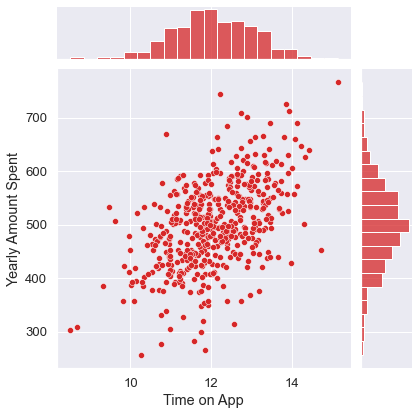

In [12]:
sns.jointplot(data = customers, x= 'Time on App', y= 'Yearly Amount Spent', color = 'tab:red' )

In [14]:
customers[['Time on App', 'Yearly Amount Spent']].corr()

,Time on App,Yearly Amount Spent
Time on App,1.000000,0.499328
Yearly Amount Spent,0.499328,1.000000


In [13]:
# The data has a moderate positive correlation, which we can see in the trend of the data and the displayed correlation 
# coefficient.  We can deduce that the yearly Amount Spent has a tendency to increases if more time is spent on the app.

#### Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.

<Figure size 1008x720 with 0 Axes>

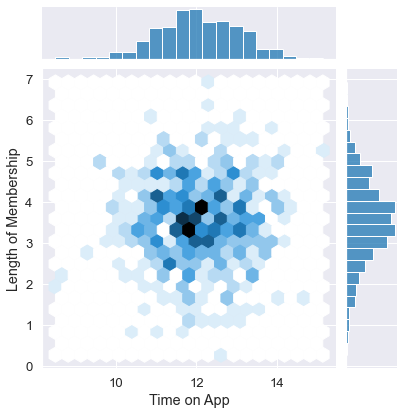

In [20]:
plt.figure(figsize = (14,10))
sns.jointplot(data = customers, x= 'Time on App', y= 'Length of Membership', color = 'tab:blue', kind = 'hex' )

In [21]:
# From the hex plot we can see that data is very dense towards the middle of the plot.  We can deduce that there are many 
# customers who have been members for 3-4 years and they spend apporximately 11.5 - 12.5 minutes on the app.

#### Create a pairplot

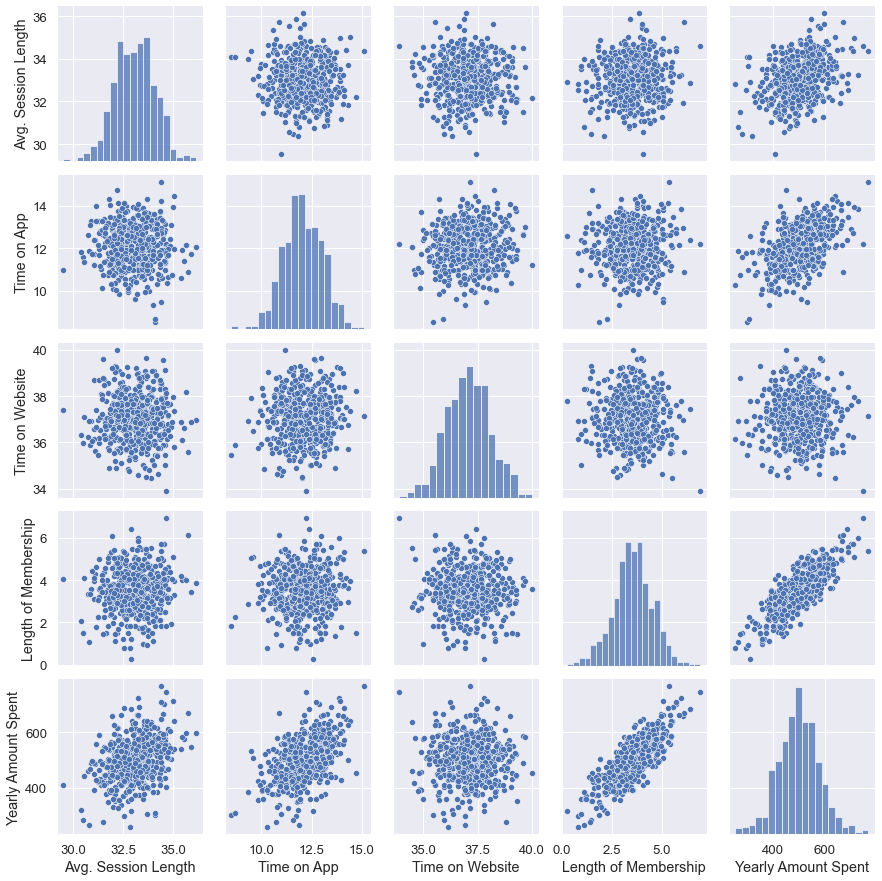

In [22]:
sns.pairplot(customers)

In [23]:
# There is a strong positive correlation between the Length of Membership and the Yearly Amount Spent by these customers.
# We can also note the correlation between the time spent on the app and the Yearly Amount Spent.  

#### Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership.

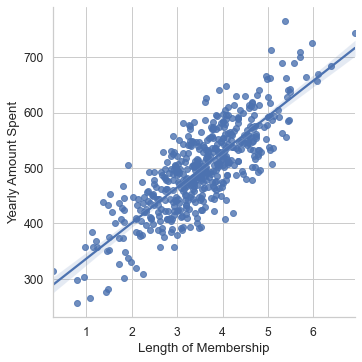

In [41]:
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.lmplot(y ="Yearly Amount Spent", x= "Length of Membership", data = customers)

In [30]:
customers[['Length of Membership', 'Yearly Amount Spent']].corr()

,Length of Membership,Yearly Amount Spent
Length of Membership,1.000000,0.809084
Yearly Amount Spent,0.809084,1.000000


#### The error bars are very thin, so this is a good linear fit for the data.

In [32]:
# From the lmplot and correlation coefficient we can see that Length of Memebership and Yearly Amount Spent have a strong 
# positie correlation, i.e. as the membership in years increase, the yearly amount by customers also increase. 
# Something else to take note of is that the shadow around the line is very thin, which means that error between the estimation
# line and the data points is relatively small.

## Training and Testing the data

#### Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [33]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [34]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = customers['Yearly Amount Spent']

#### Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 101)

## Training the Model

#### Import LinearRegression from sklearn.linear_model

In [37]:
from sklearn.linear_model import LinearRegression

#### Create an instance of a LinearRegression() model named lm.

In [38]:
lm = LinearRegression()

#### Train/fit lm on the training data.

In [39]:
lm.fit(X_train, y_train)

LinearRegression()

**Print out the coefficients of the model**

In [50]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.98154972 38.59015875  0.19040528 61.27909654]


In [28]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [57]:
# The coefficients will be interpreted in our conclusion.

## Evaluating our model

Now that we have fit our data to the model, let's evaluate its performance by predicting off the test values.

#### Use lm.predict() to make predictions off the X_test set of the data.

In [40]:
predictions = lm.predict(X_test)
predictions

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

#### Create a scatterplot of the real test values versus the predicted values.

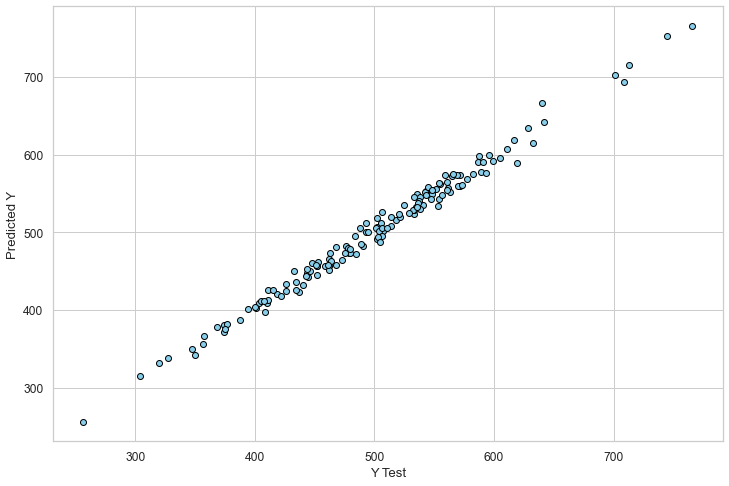

In [45]:
plt.figure(figsize =(12,8))
plt.scatter(x= y_test, y= predictions, color = 'skyblue', edgecolors ='black')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y');

In [46]:
# From the scatterplot we can see that there is a very strong correlation between the predicted y's and the actual y's in
# the test data.  This means that we have a very good model. 

## Evaluating the Model

Let's evaluate our model's performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [33]:
from sklearn import metrics

In [34]:
metrics.mean_absolute_error(y_test, predictions)

7.228148653430838

In [36]:
metrics.mean_squared_error(y_test, predictions)

79.81305165097451

In [37]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

8.933815066978637

In [60]:
metrics.explained_variance_score(y_test, predictions)

0.9890771231889607

In [ ]:
# From the r^2 mtric we can see that our model explains approximately 99% of the variance in the data.
# The other metrics are interpreted below

In [38]:
customers['Yearly Amount Spent'].mean()

499.31403825859053

In [47]:
customers['Yearly Amount Spent'].min()

256.67058229005585

In [48]:
customers['Yearly Amount Spent'].max()

765.5184619388372

#### Mean Absolute Error: The MAE = 7.228.  This metric predicts that on average our model's predictions (of Yearly Amounts Spent) are off by approximately 7,22 dollars, which is a small amount compared to the mean yearly amount spent per customer.

#### Root Mean Squared Error: The RMSE = 8.93.  This metric predicts that averagely our model's predictions (of Yearly Amounts Spent) are off by approximately 8.93, which is a small amount compared to the mean amount spent per customer per year.

#### From the r^2 prediction of 99% and the other metrics we can deduce that this is a very good model for our data.

## Residuals

#### Plot a histogram of the residuals and make sure it looks normally distributed.

C:\Users\Rouche\Desktop\Data_Science_Bootcamp\env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


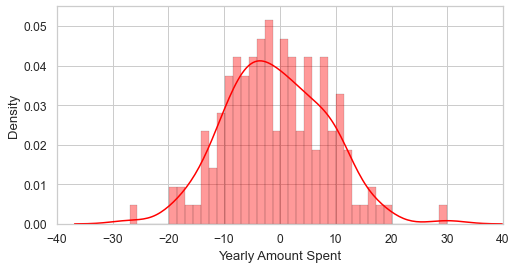

In [60]:
plt.figure(figsize = (8,4))

ax= sns.distplot((y_test-predictions), bins=40, color= 'red', hist_kws = dict(edgecolor = 'black', linewidth=0.3))
ax.set(xlim=(-40, 40))
ax.set(ylim=(0, 0.055));

In [56]:
# The residuals are approximately normally distributed.
# We do not have to be too concerned about the residuals, since we already know that we have a good fit for our data.

## Conclusion

The original request was that we need to determine if the company needs to spend more time on developing their mobile app or their website.  After we trained our model at the top we printed out the coefficients of each of the numerical columns w.r.t the Yearly Amount Spent.  We are able to answer the company by intrepreting these coefficients:

In [58]:
coef_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### Interpretations of the coefficients:

* Holding all other features fixed, a 1 unit increase in average session length is associated with an increase of $25.98 spent per year.

* Holding all other features fixed, a 1 unit increase in Time on the app is associated with an increase of $38.59 spent per year.

* Holding all other features fixed, a 1 unit increase in Time on the website is associated with an increase of $0.19 spent per year.

* Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of $61.279 spent per year.

#### We can see that the yearly income increases with a greater capacity if customers spend time on the app.  The company should thus focus more on their mobile app, since the app performs better for increases in the yearly sales amount.
#### It would be good to do further analysis on the data to be able to give a more comprehensive answer to this question. 

## Thank you for viewing my project!  I hope you enjoyed it.